# Final Project: Overview

# Objective

The objective of this project is for you to demonstrate your mastery of the Machine Learning process
**using Neural Networks**.



# Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline

## Import tensorflow
import tensorflow as tf
from tensorflow.keras.utils import plot_model

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, balanced_accuracy_score
from sklearn.inspection import permutation_importance

# Import Data

In [3]:
df = pd.read_csv('Data/train/AAPL.csv', index_col="Dt")
df

,Adj Close,Close,Div,Factor,High,Low,Open,Volume
Dt,,,,,,,,
2000-01-03,3.4785,111.938,0.0,1.0,112.5000,101.688,104.8750,133949200.0
2000-01-04,3.1852,102.500,0.0,1.0,110.6250,101.188,108.2500,128094400.0
2000-01-05,3.2318,104.000,0.0,1.0,110.5630,103.000,103.7500,194580400.0
2000-01-06,2.9521,95.000,0.0,1.0,107.0000,95.000,106.1183,191993200.0
2000-01-07,3.0920,99.500,0.0,1.0,101.0000,95.500,96.5000,115183600.0
...,...,...,...,...,...,...,...,...
2016-12-23,111.3073,116.520,0.0,1.0,116.5255,115.590,115.5900,14249500.0
2016-12-27,112.0142,117.260,0.0,1.0,117.8000,116.490,116.5200,18296900.0
2016-12-28,111.5366,116.760,0.0,1.0,118.0170,116.200,117.5200,20905900.0


# EDA

Move the close data which is the target variable to the last column

In [4]:
df = df.reindex(columns=['Adj Close', 'Div', 'Factor', 'High', 'Low', 'Open', 'Volume','Close'])
df

,Adj Close,Div,Factor,High,Low,Open,Volume,Close
Dt,,,,,,,,
2000-01-03,3.4785,0.0,1.0,112.5000,101.688,104.8750,133949200.0,111.938
2000-01-04,3.1852,0.0,1.0,110.6250,101.188,108.2500,128094400.0,102.500
2000-01-05,3.2318,0.0,1.0,110.5630,103.000,103.7500,194580400.0,104.000
2000-01-06,2.9521,0.0,1.0,107.0000,95.000,106.1183,191993200.0,95.000
2000-01-07,3.0920,0.0,1.0,101.0000,95.500,96.5000,115183600.0,99.500
...,...,...,...,...,...,...,...,...
2016-12-23,111.3073,0.0,1.0,116.5255,115.590,115.5900,14249500.0,116.520
2016-12-27,112.0142,0.0,1.0,117.8000,116.490,116.5200,18296900.0,117.260
2016-12-28,111.5366,0.0,1.0,118.0170,116.200,117.5200,20905900.0,116.760


Check the shape of dataframe

In [5]:
df.shape

(4277, 8)

By looking at the shape and information of the dataframe, I know that there is no null value in the data, and all data type are good. So I don't need to handle missing features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 2000-01-03 to 2016-12-30
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  4277 non-null   float64
 1   Div        4277 non-null   float64
 2   Factor     4277 non-null   float64
 3   High       4277 non-null   float64
 4   Low        4277 non-null   float64
 5   Open       4277 non-null   float64
 6   Volume     4277 non-null   float64
 7   Close      4277 non-null   float64
dtypes: float64(8)
memory usage: 300.7+ KB


By using descirbe function, I found out that high and low are very similar to close, so those two feature can help me a lot on the prediction of close value.

In [7]:
df.describe()

,Adj Close,Div,Factor,High,Low,Open,Volume,Close
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4.277000e+03,4277.000000
mean,34.065846,0.001999,1.001870,172.424040,168.407568,170.528689,1.299660e+08,170.450354
std,36.698987,0.031011,0.094251,174.989551,171.934671,173.604272,9.970883e+07,173.484604
min,0.815400,0.000000,1.000000,13.190000,12.720000,12.990000,9.835000e+06,13.120000
25%,3.115300,0.000000,1.000000,40.260000,39.030000,39.530000,6.363350e+07,39.759000
50%,16.948300,0.000000,1.000000,108.360000,105.200000,106.959000,1.016484e+08,106.745000
75%,62.413600,0.000000,1.000000,224.980000,217.890000,220.010000,1.679636e+08,222.250000
max,122.771400,0.570000,7.000000,705.070000,699.570000,702.410000,1.855410e+09,702.100000


Checking if there are duplicates in the data, the result show there are none.

In [8]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Adj Close,Div,Factor,High,Low,Open,Volume,Close
Dt,,,,,,,,


Check the any column has extreme outliers. Adj Close has none, high, low, and close has some outliers in acceptable range.

<function matplotlib.pyplot.show(close=None, block=None)>

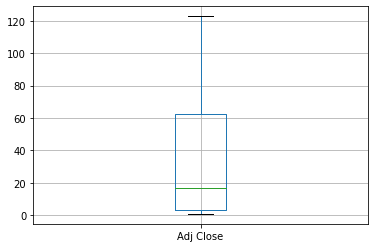

In [9]:
df.boxplot(column = "Adj Close")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

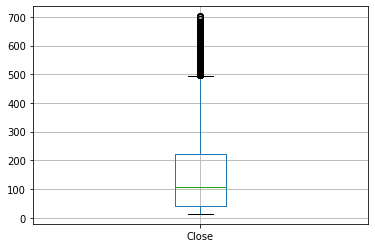

In [10]:
df.boxplot(column = "Close")
plt.show

Seems Volumn has some extreme outliers, so I would replace the outlier.

<AxesSubplot:>

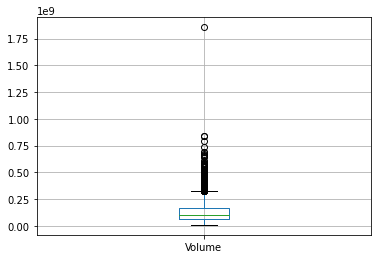

In [11]:
df.boxplot(column = "Volume")

In [12]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    low = Q1-(1.5*IQR)
    high = Q3+(1.5*IQR)
    return low, high

In [13]:
low, high = remove_outlier(df['Volume'])
df["Volume"] = np.where(df["Volume"]>high, high, df["Volume"])
df["Volume"] = np.where(df["Volume"]<low, low, df["Volume"])

<AxesSubplot:>

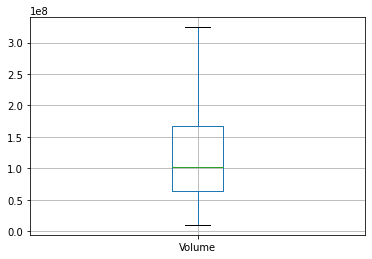

In [14]:
df.boxplot(column = "Volume")

Now volume columns looks perfect.

# Data preprocessing
I want 80% data to be my training set and 20% data be my testing dataset. Here X is the data except close,and y is the close. 

In [15]:
def standard_scaler(train, test):
    train_samples, train_nx, train_ny = train.shape
    test_samples, test_nx, test_ny = test.shape
    
    train = train.reshape((train_samples, train_nx * train_ny))
    test = test.reshape((test_samples, test_nx * test_ny))
    
    scaler = StandardScaler()
    scaler.fit(train)
    train = scaler.transform(train)
    test = scaler.transform(test)
    
    train = train.reshape((train_samples, train_nx, train_ny))
    test = test.reshape((test_samples, test_nx, test_ny))
    return train, test

To do standard scaler, the data need to be in 2 dims, so I reshape the train and test data to transform, then reshape them back.

In [16]:
def preprocess_data(df, seq):
    num_features = len(df.columns)
    data = df.values
    
    sequence = seq + 1
    result = []
    for i in range(len(data) - sequence):
        result.append(data[i:i+sequence])
    
    result = np.array(result)
    row = round(0.8 * result.shape[0])
    train = result[:row, :]
    test = result[row:, :]
    
    train, test = standard_scaler(train, test)
    
    X_train = train[:, : -1]
    y_train = train[:, -1][: ,-1]
    X_test = test[:, : -1]
    y_test = test[:, -1][ : ,-1]
    
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], num_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], num_features))  

    return [X_train, y_train, X_test, y_test]

Here is train and test datasets.

In [17]:
window = 20
X_train, y_train, X_test, y_test = preprocess_data(df[::-1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (3405, 20, 8)
y_train (3405,)
X_test (851, 20, 8)
y_test (851,)


# SVM
Before using neuron network, I want to first use svm to do regression. I need to reshape X_train and X_test to 2 dim to use SVM fit.

In [18]:
regr = svm.SVR()
train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
regr.fit(train, y_train)
pred = regr.predict(test)

The accuracy score is pretty low.

In [19]:
regr.score(test,y_test)

0.7906743638541411

Here is the graph of predict vs. actual. SVM actually did a great job that I didn't expect. There are some places that predicts are far off the actual close value, but for the most part, it did a great job

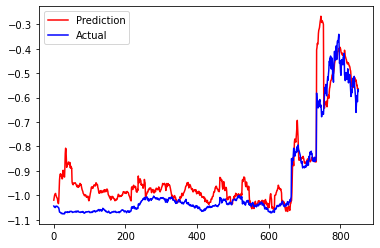

In [20]:
plt.plot(pred, color='red', label='Prediction')
plt.plot(y_test, color='blue', label='Actual')
plt.legend(loc='upper left')
plt.show()

# Create simple CNN model
For the first model, I would try the simplest CNN model as baseline method

In [21]:
def build_model1(layers):
    model = Sequential()
    model.add(Conv1D(128, kernel_size=3, padding='same', activation="relu", input_shape=(20,8)))
    model.add(Dropout(rate=0.2))
    model.add(Flatten())
    model.add(Dense(layers[3], activation="relu"))
    model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
    return model

First I build the model, then fit the model. I set epochs to 50.

In [22]:
model1 = build_model1([X_train.shape[2], window, 100, 1])

In [23]:
model1.fit(X_train,y_train,batch_size=512,epochs=50,validation_split=0.1,verbose=0)

The MSE score for train and test are both bad, but it's just the simplest model. I will see if the scores improve in other models.

In [24]:
trainScore = model1.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model1.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.31 MSE (0.56 RMSE)
Test Score: 0.95 MSE (0.97 RMSE)


# Complex CNN Model
I will put more layers into the CNN model, include max pooling layers.

In [25]:
def build_model2(layers):
    model = Sequential()
    model.add(Conv1D(128, kernel_size=3, padding='same', activation="relu", input_shape=(20,8)))
    model.add(Conv1D(128, kernel_size=3, padding='same', activation="relu"))
    model.add(Dropout(rate=0.2))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(256, kernel_size=3, padding='same', activation="relu"))
    model.add(Conv1D(256, kernel_size=3, padding='same', activation="relu"))
    model.add(Dropout(rate=0.2))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(layers[3], activation="relu"))
    model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
    return model

In [26]:
model2 = build_model2([X_train.shape[2], window, 100, 1])
model2.fit(X_train,y_train,batch_size=512,epochs=50,validation_split=0.1,verbose=0)

The train and test scores become worse then the baseline model.

In [27]:
trainScore = model2.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model2.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 1.00 MSE (1.00 RMSE)
Test Score: 0.95 MSE (0.97 RMSE)


In [28]:
def build_model(layers):
    d = 0.2
    model = Sequential()
    model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
    model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
    model.add(Dense(16,kernel_initializer='uniform',activation='relu'))        
    model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
    model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
    return model

# LSTM
Using RNN model or LSTM. Also I set return sequences to true, so I can have two LSTM layers.

In [29]:
def build_model3(layers):
    model = Sequential()
    model.add(LSTM(128,input_shape=(layers[1], layers[0]),activation='relu', return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(128,input_shape=(layers[1], layers[0]),activation='relu', return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(layers[3]))


    model.compile(loss="mse", optimizer="rmsprop", metrics=['accuracy'])
    return model

In [30]:
model3 = build_model3([X_train.shape[2], window, 100, 1])

In [31]:
model3.fit(X_train,y_train,batch_size=512,epochs=50,validation_split=0.1,verbose=0)

The scores shows LSTM did a suprisingly good job to predict the close value of stock. I expect LSTM to have lower MSE scores than CNN but not this good.

In [32]:
trainScore = model3.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model3.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.00 MSE (0.07 RMSE)
Test Score: 0.00 MSE (0.04 RMSE)


The graph of LSTM model, I can see that predict are very similar to the actual.

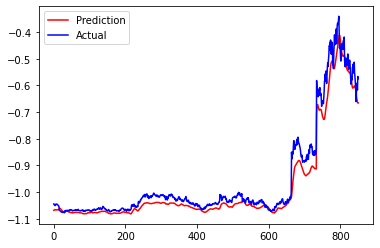

In [33]:
%matplotlib inline 
pred = model3.predict(X_test)
plt.plot(pred, color='red', label='Prediction')
plt.plot(y_test, color='blue', label='Actual')
plt.legend(loc='upper left')
plt.show()

Try different optimizier for LSTM.

In [34]:
def build_model4(layers):
    model = Sequential()
    model.add(LSTM(128,input_shape=(layers[1], layers[0]),activation='relu', return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(128,input_shape=(layers[1], layers[0]),activation='relu', return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(layers[3]))

    model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
    return model

In [35]:
model4 = build_model4([X_train.shape[2], window, 100, 1])
model4.fit(X_train,y_train,batch_size=512,epochs=50,validation_split=0.1,verbose=0)

By switch the optimizer to adam, the mse score for both train and test has improved.

In [36]:
trainScore = model4.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model4.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.00 MSE (0.06 RMSE)
Test Score: 0.00 MSE (0.04 RMSE)


By comparing the graph, we can see that using adam as optimizer has a better prediction overall, espically on the fisrt half of the data.

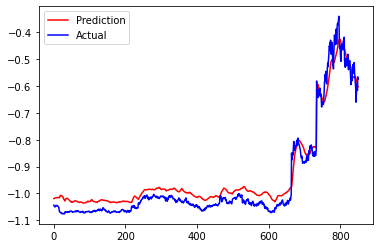

In [37]:
%matplotlib inline 
pred = model4.predict(X_test)
plt.plot(pred, color='red', label='Prediction')
plt.plot(y_test, color='blue', label='Actual')
plt.legend(loc='upper left')
plt.show()

# Feature Engineering
I would add another stock's close price as a new feature into the datafram to help me predict close price of AAPL. I choose SPY because they are related. I make assumation that those two stock may have a same trending, so SPY's close can help me predict.

In [38]:
SPY = pd.read_csv('Data/train/SPY.csv', index_col="Dt")
SPY

,Adj Close,Close,Div,Factor,High,Low,Open,Volume
Dt,,,,,,,,
2000-01-03,100.4705,145.438,0.0,1.0,148.2472,143.875,148.250,8164300.0
2000-01-04,96.5415,139.750,0.0,1.0,144.0630,139.641,143.531,8089800.0
2000-01-05,96.7142,140.000,0.0,1.0,141.5284,137.250,139.938,12177900.0
2000-01-06,95.1599,137.750,0.0,1.0,141.5000,137.750,139.625,6227200.0
2000-01-07,100.6864,145.750,0.0,1.0,145.7500,140.063,140.313,8066500.0
...,...,...,...,...,...,...,...,...
2016-12-23,214.2890,225.710,0.0,1.0,225.7200,225.210,225.430,36697800.0
2016-12-27,214.8206,226.270,0.0,1.0,226.7300,226.000,226.020,42672500.0
2016-12-28,213.0452,224.400,0.0,1.0,226.5900,224.270,226.570,64095000.0


Import SPY data, and add SPY's close price into data.

In [39]:
df["SPY"] = SPY["Close"]
df = df.reindex(columns=['Adj Close', 'Div', 'Factor', 'High', 'Low', 'Open', 'Volume','SPY','Close'])
df

,Adj Close,Div,Factor,High,Low,Open,Volume,SPY,Close
Dt,,,,,,,,,
2000-01-03,3.4785,0.0,1.0,112.5000,101.688,104.8750,133949200.0,145.438,111.938
2000-01-04,3.1852,0.0,1.0,110.6250,101.188,108.2500,128094400.0,139.750,102.500
2000-01-05,3.2318,0.0,1.0,110.5630,103.000,103.7500,194580400.0,140.000,104.000
2000-01-06,2.9521,0.0,1.0,107.0000,95.000,106.1183,191993200.0,137.750,95.000
2000-01-07,3.0920,0.0,1.0,101.0000,95.500,96.5000,115183600.0,145.750,99.500
...,...,...,...,...,...,...,...,...,...
2016-12-23,111.3073,0.0,1.0,116.5255,115.590,115.5900,14249500.0,225.710,116.520
2016-12-27,112.0142,0.0,1.0,117.8000,116.490,116.5200,18296900.0,226.270,117.260
2016-12-28,111.5366,0.0,1.0,118.0170,116.200,117.5200,20905900.0,224.400,116.760


Check if there are null value in SPY. Check if there are extreme outlier in SPY

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 2000-01-03 to 2016-12-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  4277 non-null   float64
 1   Div        4277 non-null   float64
 2   Factor     4277 non-null   float64
 3   High       4277 non-null   float64
 4   Low        4277 non-null   float64
 5   Open       4277 non-null   float64
 6   Volume     4277 non-null   float64
 7   SPY        4277 non-null   float64
 8   Close      4277 non-null   float64
dtypes: float64(9)
memory usage: 334.1+ KB


In [41]:
df.describe()

,Adj Close,Div,Factor,High,Low,Open,Volume,SPY,Close
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4.277000e+03,4277.000000,4277.000000
mean,34.065846,0.001999,1.001870,172.424040,168.407568,170.528689,1.248138e+08,137.798293,170.450354
std,36.698987,0.031011,0.094251,174.989551,171.934671,173.604272,7.997319e+07,36.072168,173.484604
min,0.815400,0.000000,1.000000,13.190000,12.720000,12.990000,9.835000e+06,68.110000,13.120000
25%,3.115300,0.000000,1.000000,40.260000,39.030000,39.530000,6.363350e+07,112.970000,39.759000
50%,16.948300,0.000000,1.000000,108.360000,105.200000,106.959000,1.016484e+08,129.610000,106.745000
75%,62.413600,0.000000,1.000000,224.980000,217.890000,220.010000,1.679636e+08,151.050000,222.250000
max,122.771400,0.570000,7.000000,705.070000,699.570000,702.410000,3.244588e+08,227.760000,702.100000


<AxesSubplot:>

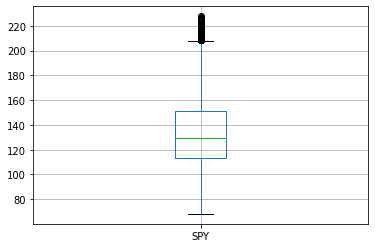

In [42]:
df.boxplot(column = "SPY")

Create train and test.

In [43]:
window = 20
X_train, y_train, X_test, y_test = preprocess_data(df[::-1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (3405, 20, 9)
y_train (3405,)
X_test (851, 20, 9)
y_test (851,)


Use the best model I have, LSTM to test what SPY can do to my model.

In [44]:
model3 = build_model3([X_train.shape[2], window, 100, 1])
model3.fit(X_train,y_train,batch_size=512,epochs=50,validation_split=0.1,verbose=0)

The MSE and RMSE score are little lower than the original data, but still okay.

In [45]:
trainScore = model3.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model3.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.01 MSE (0.10 RMSE)
Test Score: 0.03 MSE (0.17 RMSE)


This graph is similar to model3's graph which it did a bad job to predict first half the data, and did well on the second half the data.

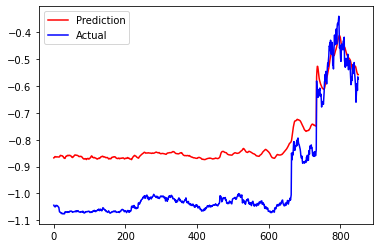

In [46]:
%matplotlib inline 
pred = model3.predict(X_test)
plt.plot(pred, color='red', label='Prediction')
plt.plot(y_test, color='blue', label='Actual')
plt.legend(loc='upper left')
plt.show()

Try model4.

In [47]:
model4 = build_model4([X_train.shape[2], window, 100, 1])
model4.fit(X_train,y_train,batch_size=512,epochs=50,validation_split=0.1,verbose=0)

In [48]:
trainScore = model4.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model4.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.00 MSE (0.05 RMSE)
Test Score: 0.00 MSE (0.04 RMSE)


The graph shows that with SPY the prediction is better on the first half of the data, and a little worse on the second half data. Over all, I think SPY may have same trend as APL in the first period of time, but in the latest year, SPY may have more difference than APL since the graph shows that. So I decide to not use SPY in my final model.

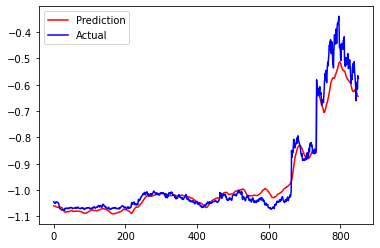

In [49]:
%matplotlib inline 
pred = model4.predict(X_test)
plt.plot(pred, color='red', label='Prediction')
plt.plot(y_test, color='blue', label='Actual')
plt.legend(loc='upper left')
plt.show()

My final model would be model4 which is LSTM using adam as optimizer.

# Submission requirements

The guidelines will be similar to the Midterm
- you will write a procedure that takes raw data and produces predictions

You will submit a *single* model for evaluation.

**Demonstrate that all cells in your notebook work**

The final cell in your notebook should print the message "Done"
- `print("Done")`
- If we run your notebook and this last cell does not execute your submission will be inadequate

## Testing

*You must perform out of sample testing*.

If you want to perform cross-validation in training, that is fine, but you
must *also* test out of sample to show that you are not over-fitting.

It is up to you to create the out of sample data that you feel best evaluates your model.

We will create holdout data (that we will not show you) for grading.

The procedure you write to make predictions should be able to work on the unseen holdout data
(similar to how it should work for your test set but the holdout set has *no targets*)

    

# The data

Data will be provided to you 
- as multiple files in a directory which we refer to as a *data directory*

The reason for this is that the different files may convey different information.

You will be responsible for deciding
- which files to use
- which fields within the files to use

We will give you a data directory for training.

# Submission guidelines

Here are the basics, a code template that you must complete is in the following cells
- you will be required to store  your model in a file
- you will be required to write a procedure `MyModel` that takes two arguments
    - `test_dir`
        - this is a *relative path* to the holdout data directory
    - `model_path`
        - this is a *relative path* to the file containing your model
- the holdout data directory is similar in structure to the training data directory
    - but without target labels !  It is your job to predict these.
- your procedure must produce predictions given this holdout data directory

This means that your procedure must
- prepare the files in the holdout data directory similar to the way that they were prepared in the training data directory

We will provide you with a sample data directory that will resemble the holdout -- this is so that you
may test the procedure you write for submission.



## Detailed submission guidelines


In **addition to your notebook that trains/evaluates your model**, 
- please also submit an **archive file of the directory** whose name is stored in `model_path`, which 
contains your trained model.
    - use `saveModel` to put your final, trained model in this directory
- We will **not** train your model; we will only use the method `MyModel`
    - which **you** will implement
    - and which uses `loadModel` and the directory whose name is stored in `model_path`
    - this will create the model that we will evaluate


Here is a code template for you to complete
- it will save your model (assuming it is in variable `my_model`)
- it provides the specification for procedure `MyModel`, which *you must complete*


In [50]:
import os
from tensorflow.keras.models import load_model

modelName = "final_model"
model_path = os.path.join(".", modelName)

def saveModel(model, model_path): 
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))
        
    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk
    model.save_weights(os.path.join(model_path, 'weights.h5'))
    
    print("Model saved in directory {dir:s}; create an archive of this directory and submit with your assignment.".format(dir=model_path))
    
def loadModel(model_path):
    # Reload the model from the 2 files we saved
    with open(os.path.join(model_path, 'config.json')) as json_file:
        json_config = json_file.read()
    model = tf.keras.models.model_from_json(json_config)
    model.load_weights(os.path.join(model_path, 'weights.h5'))
    
    return model

def MyModel(test_dir, model_path):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_path)
    
    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # We need to match your array of predictions with the examples you are predicting
    # The array below (ids) should have a one-to-one correspondence and identify the example your are predicting
    # For Bankruptcy: the Id column
    # For Stock prediction: the date on which you are making a prediction
    ids = []
    
    # YOUR CODE GOES HERE
    df = pd.read_csv('Data/train/AAPL.csv', index_col="Dt")
    df = df.reindex(columns=['Adj Close', 'Div', 'Factor', 'High', 'Low', 'Open', 'Volume', 'Close'])
    window = 20
    X_train, y_train, X_test, y_test = preprocess_data(df[::-1], window)
    
    model = build_model4([X_train.shape[2], window, 100, 1])
    model.fit(X_train,y_train,batch_size=512,epochs=50,validation_split=0.1,verbose=0)
    predictions = model.predict(X_test)
    ids = df['Close']
    
    return predictions, ids

# Assign to variable my_model the model that is your final model (the one  you will be evaluated on)
my_model = model4

saveModel(my_model, model_path)

Directory .\final_model already exists, files will be over-written.
Model saved in directory .\final_model; create an archive of this directory and submit with your assignment.


## Evaluate your model on the holdout data directory

**You must run the following cell** from the directory that contains your model file

Here is how we will evaluate your submission
- we will create a directory whose only content is
    - sub-directory `Data`
- we will copy your model file to this directory with the name stored in `model_path`
- we will run the cell in your notebook that should be a copy of the one below
    - it calls procedure `MyModel` with the arguments given below
    - your implementation of `MyModel`
        - must successfully load your model file, *given where **we** have place it as described above*
        - must successfully return one prediction for each example in the holdout directory *given where **we** have placed the holdout directory*

In [51]:
holdout_dir = os.path.join(".", "Data", "holdout")
predicts = MyModel(holdout_dir, model_path)

In [52]:
print("Done")

Done
